Link to Data Source : https://www.kaggle.com/datasets/adithyabshetty100/student-performance

Câu 1: Viết chương trình cài đặt phương pháp Bootstrap để xuất ra phân bố lấy mẫu và dải tin cậy của một thông số thống kê của một biến (đặc trưng) nào đó của dataset với:
------
• Biến (đặc trưng): do SV chọn từ dataset.\
• Thông số thống kê: giá trị trung bình (GTTB).\
• Viết hàm có:\
    • Input parameters: n (sample size), M (number of bootstrap samplings), x (confidence interval in %).\
    • Return values: phân bố lấy mẫu (bằng histogram) và dải tin cậy của GTTB của đặc trưng đã chọn.

In [26]:
#Các thư viện cần thiết
import pandas as pd

#Các thư viện dùng để trực quan hóa dữ liệu
import matplotlib.pyplot as plt
import seaborn as sns


In [37]:

#Đọc file dataset .csv vào data frame
df = pd.read_csv('../bootstrap-sampling-method/StudentsPerformance.csv')

#Xóa tất cả các hàng chứa giá trị rỗng
df = df.dropna()

#Kích thước của data frame
df.shape

(1000, 8)

In [38]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

=> Các giá trị rỗng đã được loại bỏ khỏi Dataset

Hàm sử dụng phương pháp Bootstrap để xuất ra phân bố lấy mẫu và dải tin cậy:
-----------------------------------------------------------------
Đầu vào: N, M, x.\
Trong đó: \
    + N: số quan sát có trong 1 mẫu (kích thước của 1 mẫu).\
    + M: số lượng mẫu Bootstap.\
    + x: khoảng tin cậy (%).

In [39]:
#Hàm phân bố lấy mẫu sử dụng phương pháp Bootstrap
def bootstrapping(N, M, x):
    #Khởi tạo các biến
    upper_bound = 0
    lower_bound = 0
    mean_bootstrap = []

    for _ in range(M):
        #Tạo mẫu với kích thước là N, các giá trị có thể lặp
        new_df = df_math_score.sample(n= N, replace=True)

        #Lưu giá trị Mean tìm được của mẫu đó
        mean_bootstrap.append(float(new_df.mean(axis=0)))

    #Tạo từ điển với thuộc tính: Mean Bootstrap (Math Score)
    dict = {'Mean Bootstrap (Math Score)': mean_bootstrap}
    mean_bootstrap = pd.DataFrame(dict)

    #Sắp xếp lại các giá trị theo thuộc tính 'Mean Bootstrap (Math Score)' trong mean_bootstrap theo thứ tự tăng dần
    sorted_df = mean_bootstrap.sort_values(by='Mean Bootstrap (Math Score)', ascending=True)
    
    lower_bound = sorted_df.iloc[round(M*x)] #Tính vị trí giới hạn dưới
    upper_bound = sorted_df.iloc[round(M*(1-x))] #Tính vị trí giới hạn trên
    mean_line = sorted_df.mean() #Tính vị trí của mean

    return mean_bootstrap, lower_bound, upper_bound, mean_line


Cơ sở để tính dải tin cậy:
-------
Cú pháp hàm SMALL trong file excel Bootstrap_method:\
SMALL(array, k)\
\
        * Trong đó:\
            -array: Là phạm vi vùng dữ liệu dạng số chứa giá trị bạn cần xác định giá trị nhỏ thứ k.\
            -k: Là thứ hạng của giá trị (tính từ giá trị nhỏ nhất) trong vùng dữ liệu cần trả về.\
\
ÁP DỤNG:
* Sử dụng hàm iloc trong dataframe để tìm giá trị của vị trí có trong tập data frame
* array sẽ là tập sorted_df. 
* Đối với cách tìm vị trí giới hạn dưới: 
    - k = M * x.
* Đối với cách tìm vị trí giới hạn trên: 
    - k = M * (1 - x).

Xuất đồ thị Histogram - phân bố lấy mẫu với dải tin cậy của GTTB của đặc trưng
------------------------------------------------------------

Giới hạn dưới: 64.75
Giới hạn trên: 67.43
Mean: 66.08


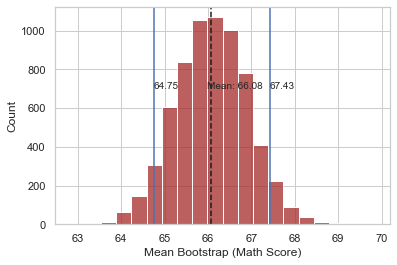

In [53]:
#Lấy tất cả record có trong dataset (gồm 1000 records) với đặc trưng (biến) là 'math score'
df_math_score = df['math score']

#Gọi hàm bootstrapping
mean_bootstrap, lower_bound, upper_bound, mean_line = bootstrapping(333,6666,0.05) # tương úng với n, M, x%

#Histogram
sns.histplot(mean_bootstrap['Mean Bootstrap (Math Score)'] ,color = 'brown', bins=20)

#Khoảng tin cậy
lower_bound = float("{:.2f}".format(float(lower_bound)))
upper_bound = float( "{:.2f}".format(float(upper_bound)))
mean_line = float( "{:.2f}".format(float(mean_line)))

print('Giới hạn dưới: ' + str(lower_bound))
print('Giới hạn trên: '  + str(upper_bound))
print('Mean: '  + str(mean_line))

plt.axvline(lower_bound, 0,20)
plt.axvline(upper_bound, 0,20)
plt.axvline(mean_line, 0,20, color = 'k', linestyle = '--')

plt.text(lower_bound, 700, str(lower_bound), fontsize=10)
plt.text(upper_bound, 700, str(upper_bound), fontsize=10)
plt.text(mean_line-0.1, 700, "Mean: " + str(mean_line), fontsize=10)
plt.show()

Câu 2:
Dựa trên cùng dataset với Câu 1, viết chương trình xuất ra và thuyết trình các thống kê mô 
tả quan trọng của các biến, các mối quan hệ giữa các biến, quy luật tiềm ẩn của dataset có 
thể quan sát nhờ các công cụ trực quan hoá dữ liệu (ví dụ: scatter plot, heat/cluster map, 
linear model plot,…).
--------

*SCATTER PLOT
-----

- Thống kê giá trị reading score và math score của 2 giới tính là Female, Male

<AxesSubplot:xlabel='math score', ylabel='reading score'>

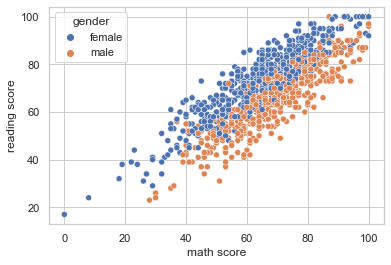

In [49]:
sns.set(style='whitegrid')
sns.scatterplot(x="math score", y="reading score", hue="gender", data=df)

- Thống kê giá trị writing score và math score của 2 giới tính là Female, Male

<AxesSubplot:xlabel='math score', ylabel='writing score'>

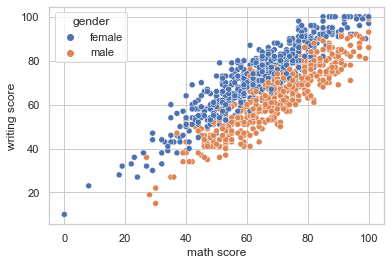

In [50]:
sns.set(style='whitegrid')
sns.scatterplot(x="math score", y="writing score", hue="gender", data=df)

- Thống kê giá trị math score và reading score của các học sinh với trạng thái đã tham gia khóa học luyện thi hay chưa

<AxesSubplot:xlabel='math score', ylabel='writing score'>

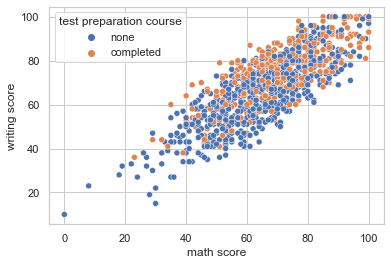

In [51]:
sns.set(style='whitegrid')
sns.scatterplot(x="math score", y="writing score", hue="test preparation course", data=df)

*BAR PLOT
----


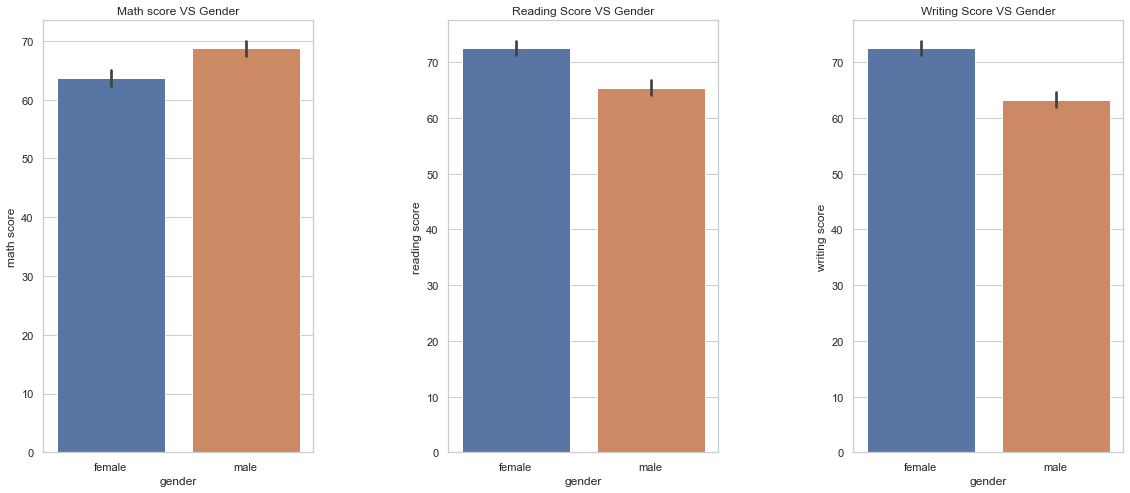

In [52]:
plt.figure(figsize=(15,6))
plt.subplots_adjust(top=1,bottom=0,right=1,left=0,hspace=0.25,wspace=0.5)
plt.subplot(131)
plt.title("Math score VS Gender")
sns.barplot(x="gender",y='math score',data=df)
plt.subplot(132)
plt.title("Reading Score VS Gender")
sns.barplot(x='gender',y='reading score',data=df)
plt.subplot(133)
plt.title("Writing Score VS Gender")
sns.barplot(x='gender',y='writing score',data=df)
plt.show()

Dựa vào ba thông kê theo dạng cột trên, em có kết luận:
- Những học sinh nam có giá trị Math Score cao hơn học sinh nữ\
=> Các bạn học sinh nam có tư duy Logic tốt hơn các bạn nữ
- Những học sinh nữ có giá trị Reading Score và Writing Score cao hơn học sinh nam\
=> Các bạn học sinh nữ có kỹ năng đọc hiểu tốt hơn các bạn nam